In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df_all = pd.read_csv('220306_slugs_dataset.csv')
df_inp = df_all.drop(['loadCase', 'out_supReac_kN_n3', 'out_supReac_kN_n4', 'out_verDisp_mm_n5'], axis=1)
df_inp = df_inp.dropna()

In [29]:
df_inp.describe()

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,out_oopDisp_mm_n2,out_oopDisp_mm_n5,out_endBend_kNm_n6
count,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000,49975.000000
mean,749.873015,10.000500,199.759649,10.010242,7.993685,11.999793,0.699832,60.026618,41.568940,182.077874,187.301203,218.388931
std,75.247244,1.988917,49.987285,1.998691,1.990544,1.001185,0.100230,10.025549,15.654733,31.026056,44.422666,59.079226
min,439.010000,0.750000,9.470000,2.070000,0.400000,8.050000,0.270000,20.910000,15.200000,73.240000,73.890000,83.330000
25%,699.075000,8.660000,166.205000,8.650000,6.655000,11.330000,0.630000,53.210000,32.600000,162.600000,160.960000,177.360000
50%,749.200000,10.010000,199.700000,10.010000,7.990000,12.000000,0.700000,59.980000,38.500000,179.730000,180.340000,209.190000
75%,801.125000,11.340000,233.475000,11.370000,9.330000,12.680000,0.770000,66.825000,46.700000,198.140000,203.755000,247.500000
max,1066.900000,18.220000,404.010000,17.860000,16.810000,16.380000,1.110000,106.850000,884.800000,497.920000,711.910000,700.150000


In [3]:
df_scl = df_inp.copy(deep=True)
scaler = preprocessing.StandardScaler()
df_scl = pd.DataFrame(scaler.fit_transform(df_scl), columns = df_scl.columns, index = df_scl.index)

In [4]:
df_scl['splits'] = pd.qcut(df_scl['out_oopDisp_mm_n2'], 100, labels=False)
df_scl

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,out_oopDisp_mm_n2,out_oopDisp_mm_n5,out_endBend_kNm_n6,splits
0,0.475730,-1.775104,0.688189,0.024896,-1.117135,0.549561,1.498249,1.403766,0.270276,0.495464,-0.153779,-0.336821,74
1,-0.595948,0.180753,-0.186442,0.620291,-0.288208,-0.369359,0.999392,-0.091429,0.155294,0.153812,-0.193174,0.333133,60
2,-0.104895,0.824326,-0.813608,1.255714,-0.288208,-0.459254,-0.497180,0.519017,0.423586,-0.857606,-0.535120,-0.638961,16
3,-0.239121,-0.593545,-0.637762,-0.085177,0.766790,-0.519183,-0.297637,0.780352,-0.687910,-0.406368,-0.529942,0.252563,34
4,-1.071984,0.733823,0.282282,-0.725603,0.093601,0.859197,1.099163,-0.333812,-0.247144,1.339601,1.239668,0.015929,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.233274,-0.472875,-0.541736,-0.030141,0.450291,0.779291,-0.796495,-0.068488,-0.521824,-0.918846,-0.535120,-0.099172,15
49996,0.575934,0.708684,-0.214250,0.114956,-0.423851,-1.038573,-0.397409,2.081042,0.263888,-0.725780,-0.680993,-0.536216,21
49997,-1.719057,0.804214,-0.528933,-0.320334,-1.991277,0.209960,0.201220,0.521012,2.346346,-0.441500,-0.858606,-1.062972,32
49998,-0.607510,-0.920359,0.284882,0.945508,1.706241,-2.047387,-0.596952,0.575873,-0.905099,-0.397988,-0.202628,1.805578,34


In [5]:
train, test = train_test_split(df_scl, test_size=0.20, stratify=df_scl['splits']) 

In [6]:
train

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,out_oopDisp_mm_n2,out_oopDisp_mm_n5,out_endBend_kNm_n6,splits
41788,0.543507,0.039972,-1.851682,-0.955756,-0.147542,0.349796,-0.497180,1.444662,-0.285472,0.337530,0.924960,-0.120838,68
9026,1.270318,0.492484,-0.520731,-1.876368,2.324169,1.198798,0.899620,1.641162,-1.243658,4.919209,5.315106,3.240953,99
38394,1.457304,1.397508,-0.371891,0.445175,0.153886,2.037812,-0.497180,0.234741,0.059475,-0.647781,-0.081293,0.315361,24
42354,0.077173,0.341646,0.424519,1.555913,-0.423851,0.489631,-0.098094,0.133000,0.493853,-0.652293,-0.534219,-0.793670,24
47514,-0.641266,0.975163,0.402513,-1.045816,-0.464041,0.729349,-0.596952,-0.824563,0.104191,-0.834400,-0.799852,-0.796547,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,0.357053,0.457288,-1.273930,0.225029,0.590957,-1.108490,-0.796495,-0.208132,-0.387678,-0.729648,-0.449802,-0.134210,21
43671,0.119434,0.542763,0.547552,0.235035,-1.257802,0.539573,-0.197866,1.166370,1.119868,-0.456971,-0.619087,-1.179935,32
43200,-0.289887,-0.457792,1.044683,1.490870,0.384981,-1.178408,-1.794210,0.294589,-0.221593,-1.064531,-0.687521,-0.835648,11
8368,-0.248955,-0.055559,-0.845016,1.816086,-0.805660,-0.189570,-0.896266,2.073063,0.832412,-1.006837,-1.085070,-0.913002,12


In [7]:
train = train.drop(['splits'], axis=1)
train

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,out_oopDisp_mm_n2,out_oopDisp_mm_n5,out_endBend_kNm_n6
41788,0.543507,0.039972,-1.851682,-0.955756,-0.147542,0.349796,-0.497180,1.444662,-0.285472,0.337530,0.924960,-0.120838
9026,1.270318,0.492484,-0.520731,-1.876368,2.324169,1.198798,0.899620,1.641162,-1.243658,4.919209,5.315106,3.240953
38394,1.457304,1.397508,-0.371891,0.445175,0.153886,2.037812,-0.497180,0.234741,0.059475,-0.647781,-0.081293,0.315361
42354,0.077173,0.341646,0.424519,1.555913,-0.423851,0.489631,-0.098094,0.133000,0.493853,-0.652293,-0.534219,-0.793670
47514,-0.641266,0.975163,0.402513,-1.045816,-0.464041,0.729349,-0.596952,-0.824563,0.104191,-0.834400,-0.799852,-0.796547
...,...,...,...,...,...,...,...,...,...,...,...,...
16720,0.357053,0.457288,-1.273930,0.225029,0.590957,-1.108490,-0.796495,-0.208132,-0.387678,-0.729648,-0.449802,-0.134210
43671,0.119434,0.542763,0.547552,0.235035,-1.257802,0.539573,-0.197866,1.166370,1.119868,-0.456971,-0.619087,-1.179935
43200,-0.289887,-0.457792,1.044683,1.490870,0.384981,-1.178408,-1.794210,0.294589,-0.221593,-1.064531,-0.687521,-0.835648
8368,-0.248955,-0.055559,-0.845016,1.816086,-0.805660,-0.189570,-0.896266,2.073063,0.832412,-1.006837,-1.085070,-0.913002


In [8]:
test = test.drop(['splits'], axis=1)
test

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime,out_oopDisp_mm_n2,out_oopDisp_mm_n5,out_endBend_kNm_n6
834,1.498634,-0.714215,-1.539600,0.295075,-0.212851,-1.587927,-0.696723,1.508499,-0.144938,-0.595888,-0.558756,-0.625927
27971,-0.371220,0.226004,-0.685774,-0.310327,-1.463778,-0.209547,0.101448,-2.128246,1.158196,-0.621995,-0.846901,-1.052985
37357,0.935552,-0.095782,0.272079,0.385135,-0.132470,-0.898737,1.398478,-1.513809,-0.055507,0.788124,0.196721,1.559465
3352,-0.170679,-0.895220,1.309153,-0.230274,-0.951350,-1.777704,1.099163,0.235738,0.270276,0.245349,-0.469837,-0.435672
23757,-1.391999,-0.080698,-1.071676,0.495208,0.374934,-0.209547,0.400763,1.284070,-0.323799,0.334952,0.286091,-0.236785
...,...,...,...,...,...,...,...,...,...,...,...,...
9012,0.710292,0.391925,-0.811808,-0.790646,-1.363302,0.050148,-0.696723,0.003330,0.921843,-0.123377,-0.060582,-0.804672
2209,-1.007662,-1.367844,-0.044005,-0.940746,2.078002,0.349796,1.198935,-0.921317,-1.301149,6.397336,7.599998,4.542608
42371,-0.265169,0.537735,-0.110222,-0.110194,1.455051,0.279878,-0.098094,0.537969,-0.770953,-0.045700,-0.307306,0.671157
22548,0.286352,0.165669,0.416117,-0.465430,-0.720255,-0.808843,-1.195581,0.430243,0.263888,-1.366861,-1.258857,-1.021502


In [9]:
X_train = train.drop(['out_oopDisp_mm_n2', 'out_oopDisp_mm_n5', 'out_endBend_kNm_n6'], axis=1)
y_train = train.filter(['out_oopDisp_mm_n2'])
X_test = test.drop(['out_oopDisp_mm_n2', 'out_oopDisp_mm_n5', 'out_endBend_kNm_n6'], axis=1)
y_test = test.filter(['out_oopDisp_mm_n2'])

In [10]:
# create linear regression object
reg = linear_model.LinearRegression()
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
X_test

,slugDen,slugLen,pockDen,pockLen,slugVel,basePer,baseAmp,basePha,simTime
834,1.498634,-0.714215,-1.539600,0.295075,-0.212851,-1.587927,-0.696723,1.508499,-0.144938
27971,-0.371220,0.226004,-0.685774,-0.310327,-1.463778,-0.209547,0.101448,-2.128246,1.158196
37357,0.935552,-0.095782,0.272079,0.385135,-0.132470,-0.898737,1.398478,-1.513809,-0.055507
3352,-0.170679,-0.895220,1.309153,-0.230274,-0.951350,-1.777704,1.099163,0.235738,0.270276
23757,-1.391999,-0.080698,-1.071676,0.495208,0.374934,-0.209547,0.400763,1.284070,-0.323799
...,...,...,...,...,...,...,...,...,...
9012,0.710292,0.391925,-0.811808,-0.790646,-1.363302,0.050148,-0.696723,0.003330,0.921843
2209,-1.007662,-1.367844,-0.044005,-0.940746,2.078002,0.349796,1.198935,-0.921317,-1.301149
42371,-0.265169,0.537735,-0.110222,-0.110194,1.455051,0.279878,-0.098094,0.537969,-0.770953
22548,0.286352,0.165669,0.416117,-0.465430,-0.720255,-0.808843,-1.195581,0.430243,0.263888


In [12]:
# regression coefficients
print('Coefficients: ', reg.coef_)
print('Coefficients: ', reg.coef_)
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [[ 0.10459307 -0.12760425 -0.05497405 -0.11446702  0.43376588 -0.00522517
   0.68935901 -0.00575216  0.11159133]]
Variance score: 0.6288432391781584


In [13]:
y_bas = df_inp['out_oopDisp_mm_n2'].to_numpy().reshape(-1, 1)
scaler_m = preprocessing.StandardScaler()
y_scl = scaler_m.fit_transform(y_bas)
y_rsl = scaler_m.inverse_transform(y_scl)

In [14]:
y_bas

array([[197.45],
       [186.85],
       [155.47],
       ...,
       [168.38],
       [169.73],
       [178.7 ]])

In [15]:
y_rsl

array([[197.45],
       [186.85],
       [155.47],
       ...,
       [168.38],
       [169.73],
       [178.7 ]])

In [16]:
y = scaler_m.inverse_transform(y_test)
yhat = scaler_m.inverse_transform(reg.predict(X_test))

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

Results of sklearn.metrics:
MAE: 11.59
MSE: 360.36
RMSE: 18.98
R-Squared: 0.63


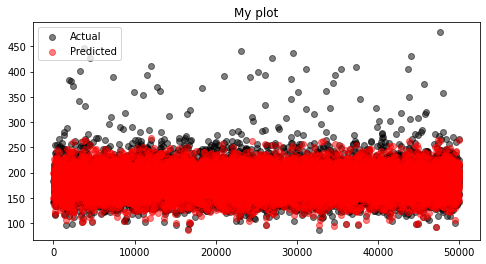

In [40]:
fig, ax = plt.subplots(figsize = (8, 4))
plt.scatter(X_test.index, y, label = "Actual", color = 'black', zorder = 1, alpha=0.5)
plt.scatter(X_test.index, yhat, label = "Predicted", color = 'red', zorder = 2, alpha=0.5)
plt.legend(loc = "upper left")
plt.title("Actual & Predicted")
plt.show()

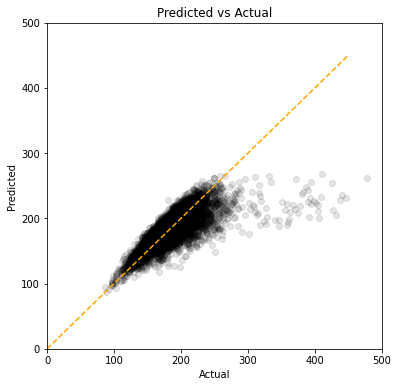

In [48]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.scatter(y, yhat, color = 'black', zorder = 1, alpha=0.1)
plt.plot([0, 450], [0, 450], '--', color = 'orange', zorder = 2)
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title("Predicted vs Actual")
plt.show()

In [54]:
from scipy import stats
params = np.append(reg.intercept_, reg.coef_)
predictions = reg.predict(X_test)

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X_test),1)), X_test, axis=1) 
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0       -0.0007            1.848    -0.000          1.000
1        0.1046            1.834     0.057          0.955
2       -0.1276            2.020    -0.063          0.950
3       -0.0550            1.858    -0.030          0.976
4       -0.1145            2.024    -0.057          0.955
5        0.4338            3.560     0.122          0.903
6       -0.0052            1.857    -0.003          0.998
7        0.6894            1.863     0.370          0.711
8       -0.0058            1.832    -0.003          0.997
9        0.1116            3.958     0.028          0.978
